In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# user for exercise 1-5
COLS = np.array([[_ for _ in range(8)] for _ in range(8)])
ROWS = np.array([[__ for _ in range(8)] for __ in range(8)])


# 1

$$
I_1(m, n) = \tfrac{1}{2} \exp\!\left(j \tfrac{2\pi}{8}(u_0 m + v_0 n)\right)
$$


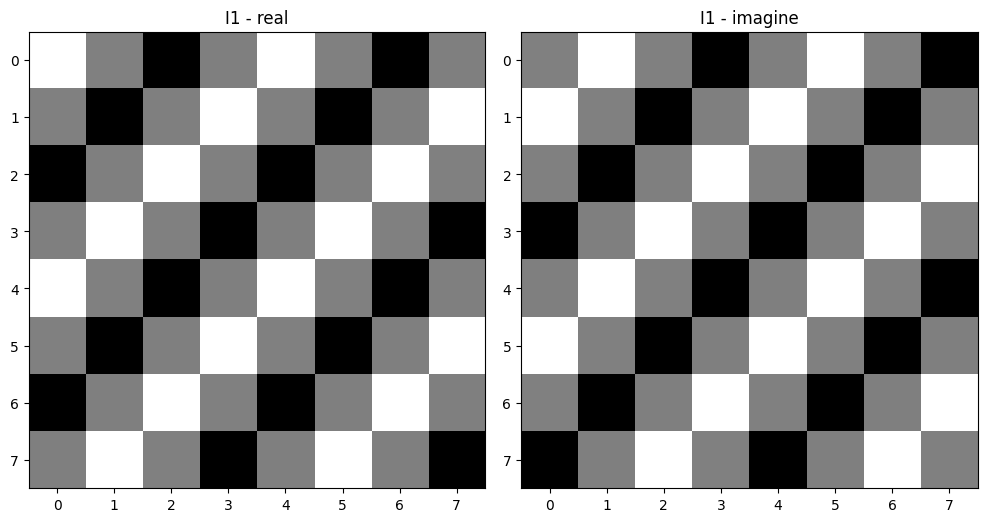

In [2]:
I1 = np.exp(1j * 2*np.pi/8 * (2*COLS + 2*ROWS))/2

plt.figure("1", (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I1.real, cmap='gray')
plt.title("I1 - real")

plt.subplot(1, 2, 2)
plt.imshow(I1.imag, cmap='gray')
plt.title("I1 - imagine")

plt.tight_layout()

# 2

$$
I_2(m, n) = \tfrac{1}{2} \exp\!\left(-j \tfrac{2\pi}{8}(u_0 m + v_0 n)\right)
$$

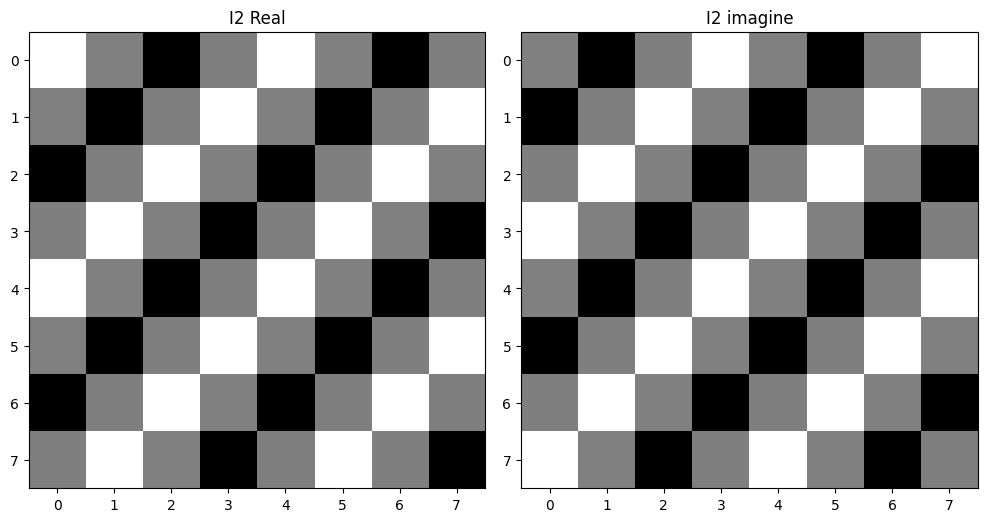

In [3]:
I2 = np.exp(-1j * 2*(np.pi/8) * (2*ROWS + 2*COLS) )

plt.figure("2", (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I2.real, cmap='gray')
plt.title("I2 Real")

plt.subplot(1, 2, 2)
plt.imshow(I2.imag, cmap='gray')
plt.title("I2 imagine")

plt.tight_layout()


# 3

$$
I_3(m, n) = \cos\!\left(\tfrac{2\pi}{8}(u_0 m + v_0 n)\right)
$$


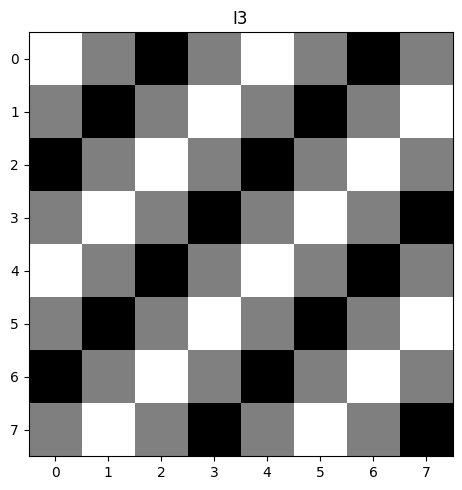

In [4]:
I3 = np.cos(2*(np.pi/8) * (2*ROWS + 2*COLS))

plt.figure("3", (10, 5))
plt.imshow(I3, cmap='gray')
plt.title("I3")
plt.tight_layout()


# 4
$$
I_4(m, n) = \sin\!\left(\tfrac{2\pi}{8}(u_0 m + v_0 n)\right)
$$


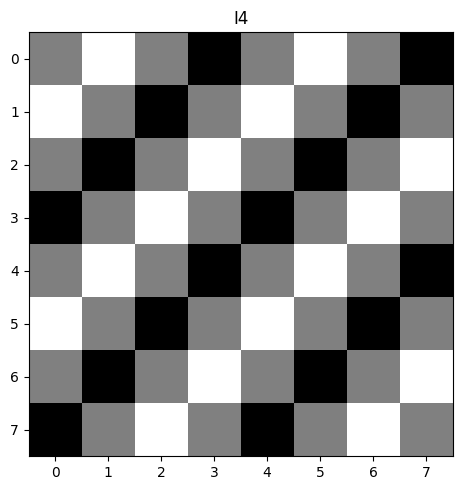

In [5]:
I4 = np.sin(2*(np.pi/8) * (2*ROWS + 2*COLS))

plt.figure("4", (10, 5))
plt.imshow(I4, cmap='gray')
plt.title("I4")
plt.tight_layout()

# 5

$$
I_5(m, n) = \cos\!\left(\tfrac{2\pi}{8}(u_1 m + v_1 n)\right)
$$

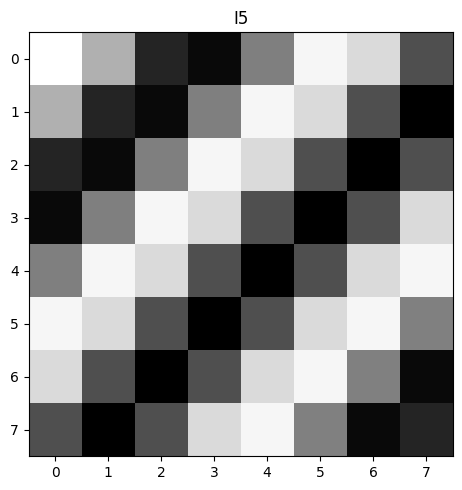

In [6]:
I5 = np.cos(2*(np.pi/8) * (1.5*ROWS + 1.5*COLS))

plt.figure("5", (10, 5))
plt.imshow(I5, cmap='gray')
plt.title("I5")
plt.tight_layout()

# 6

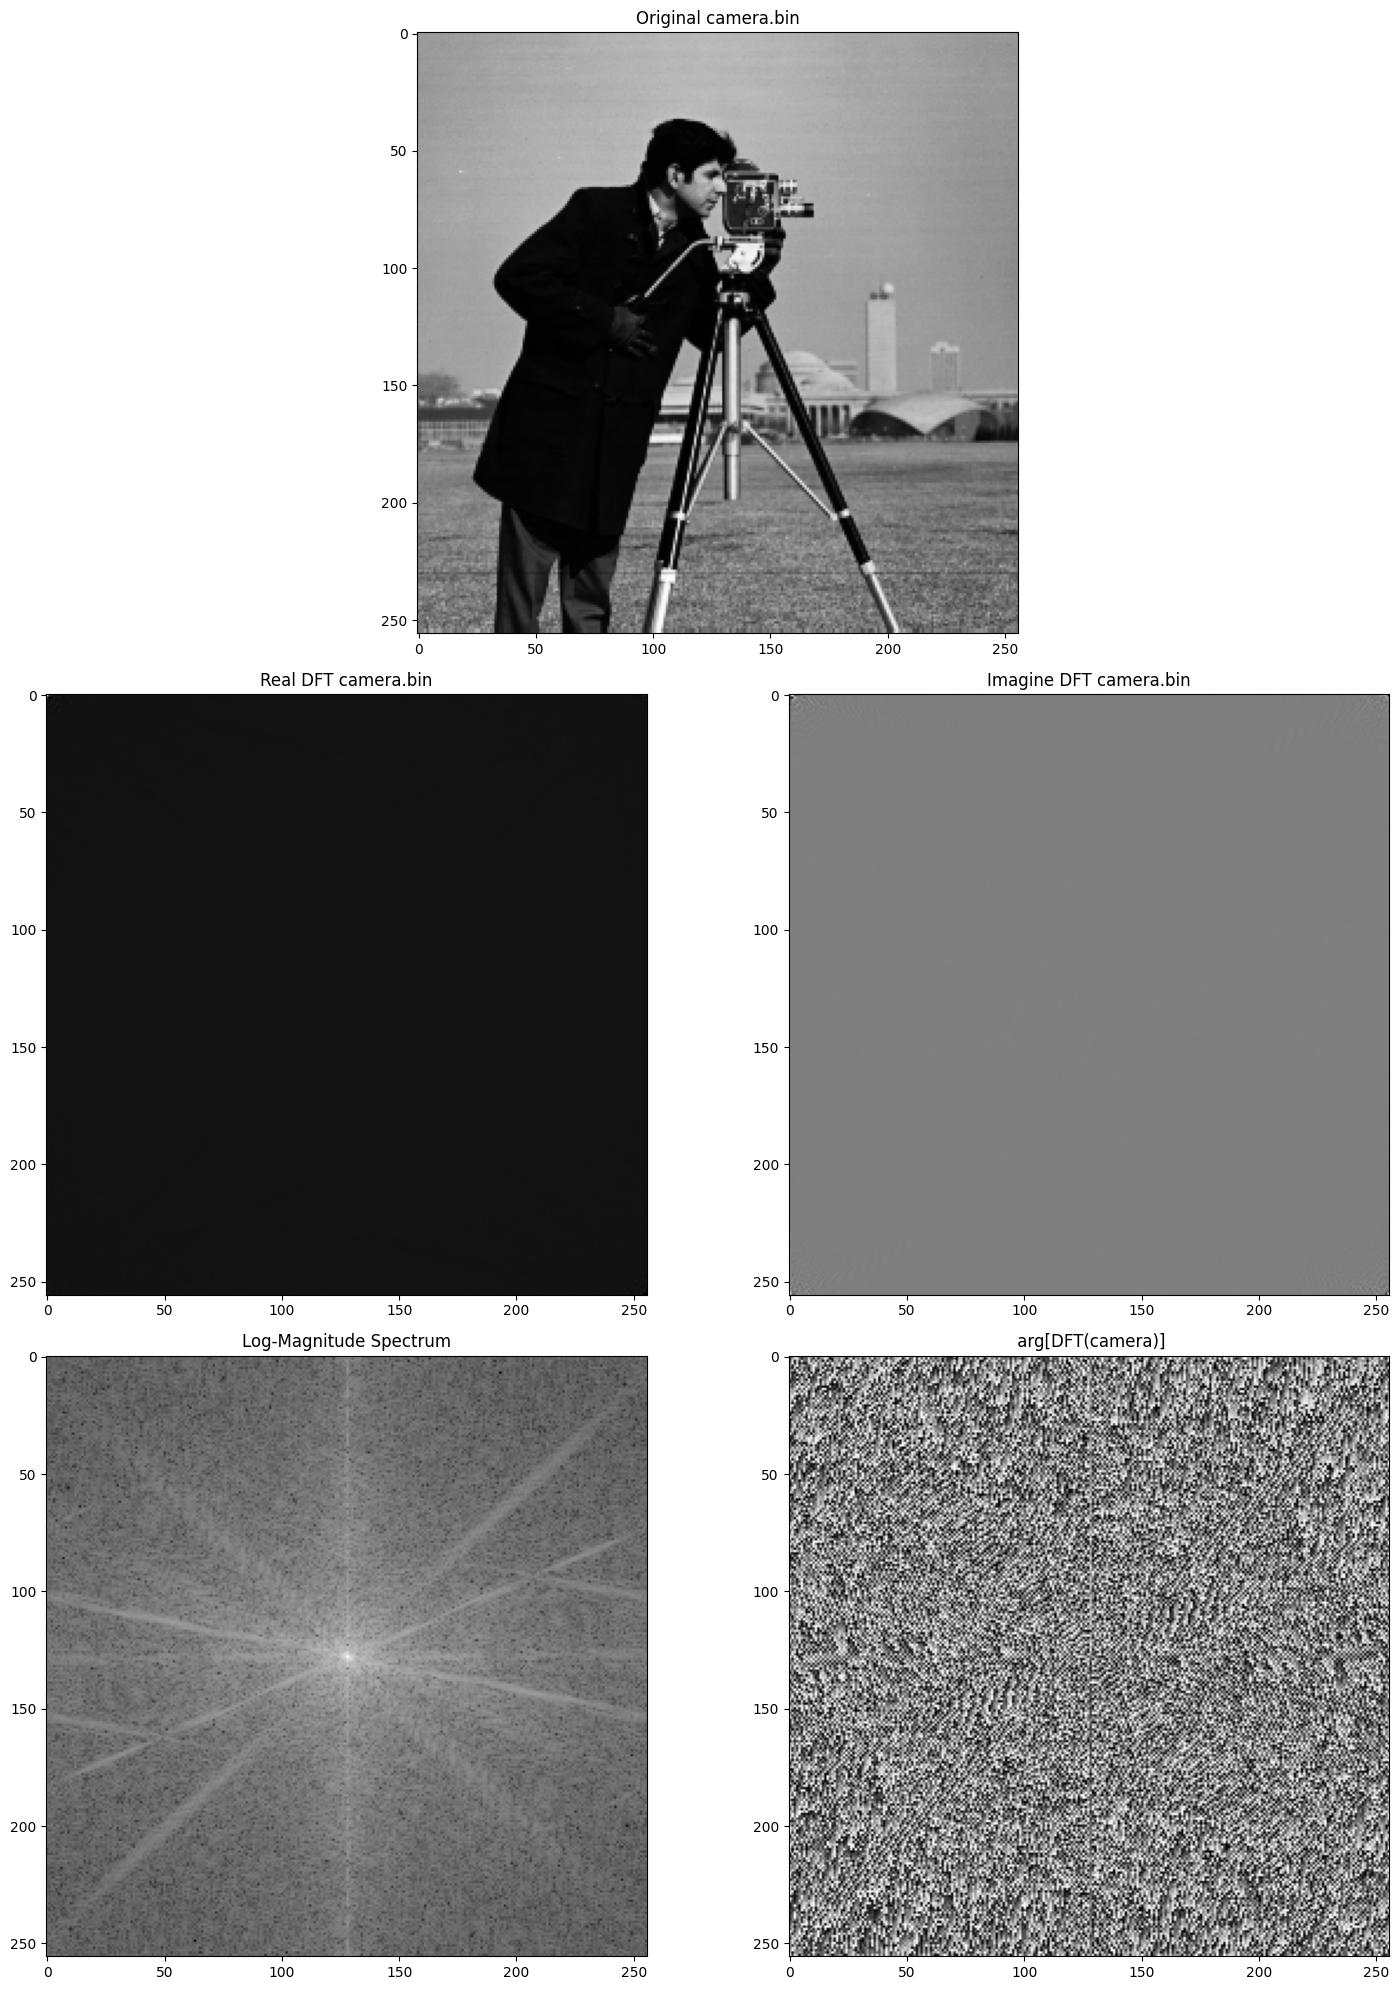

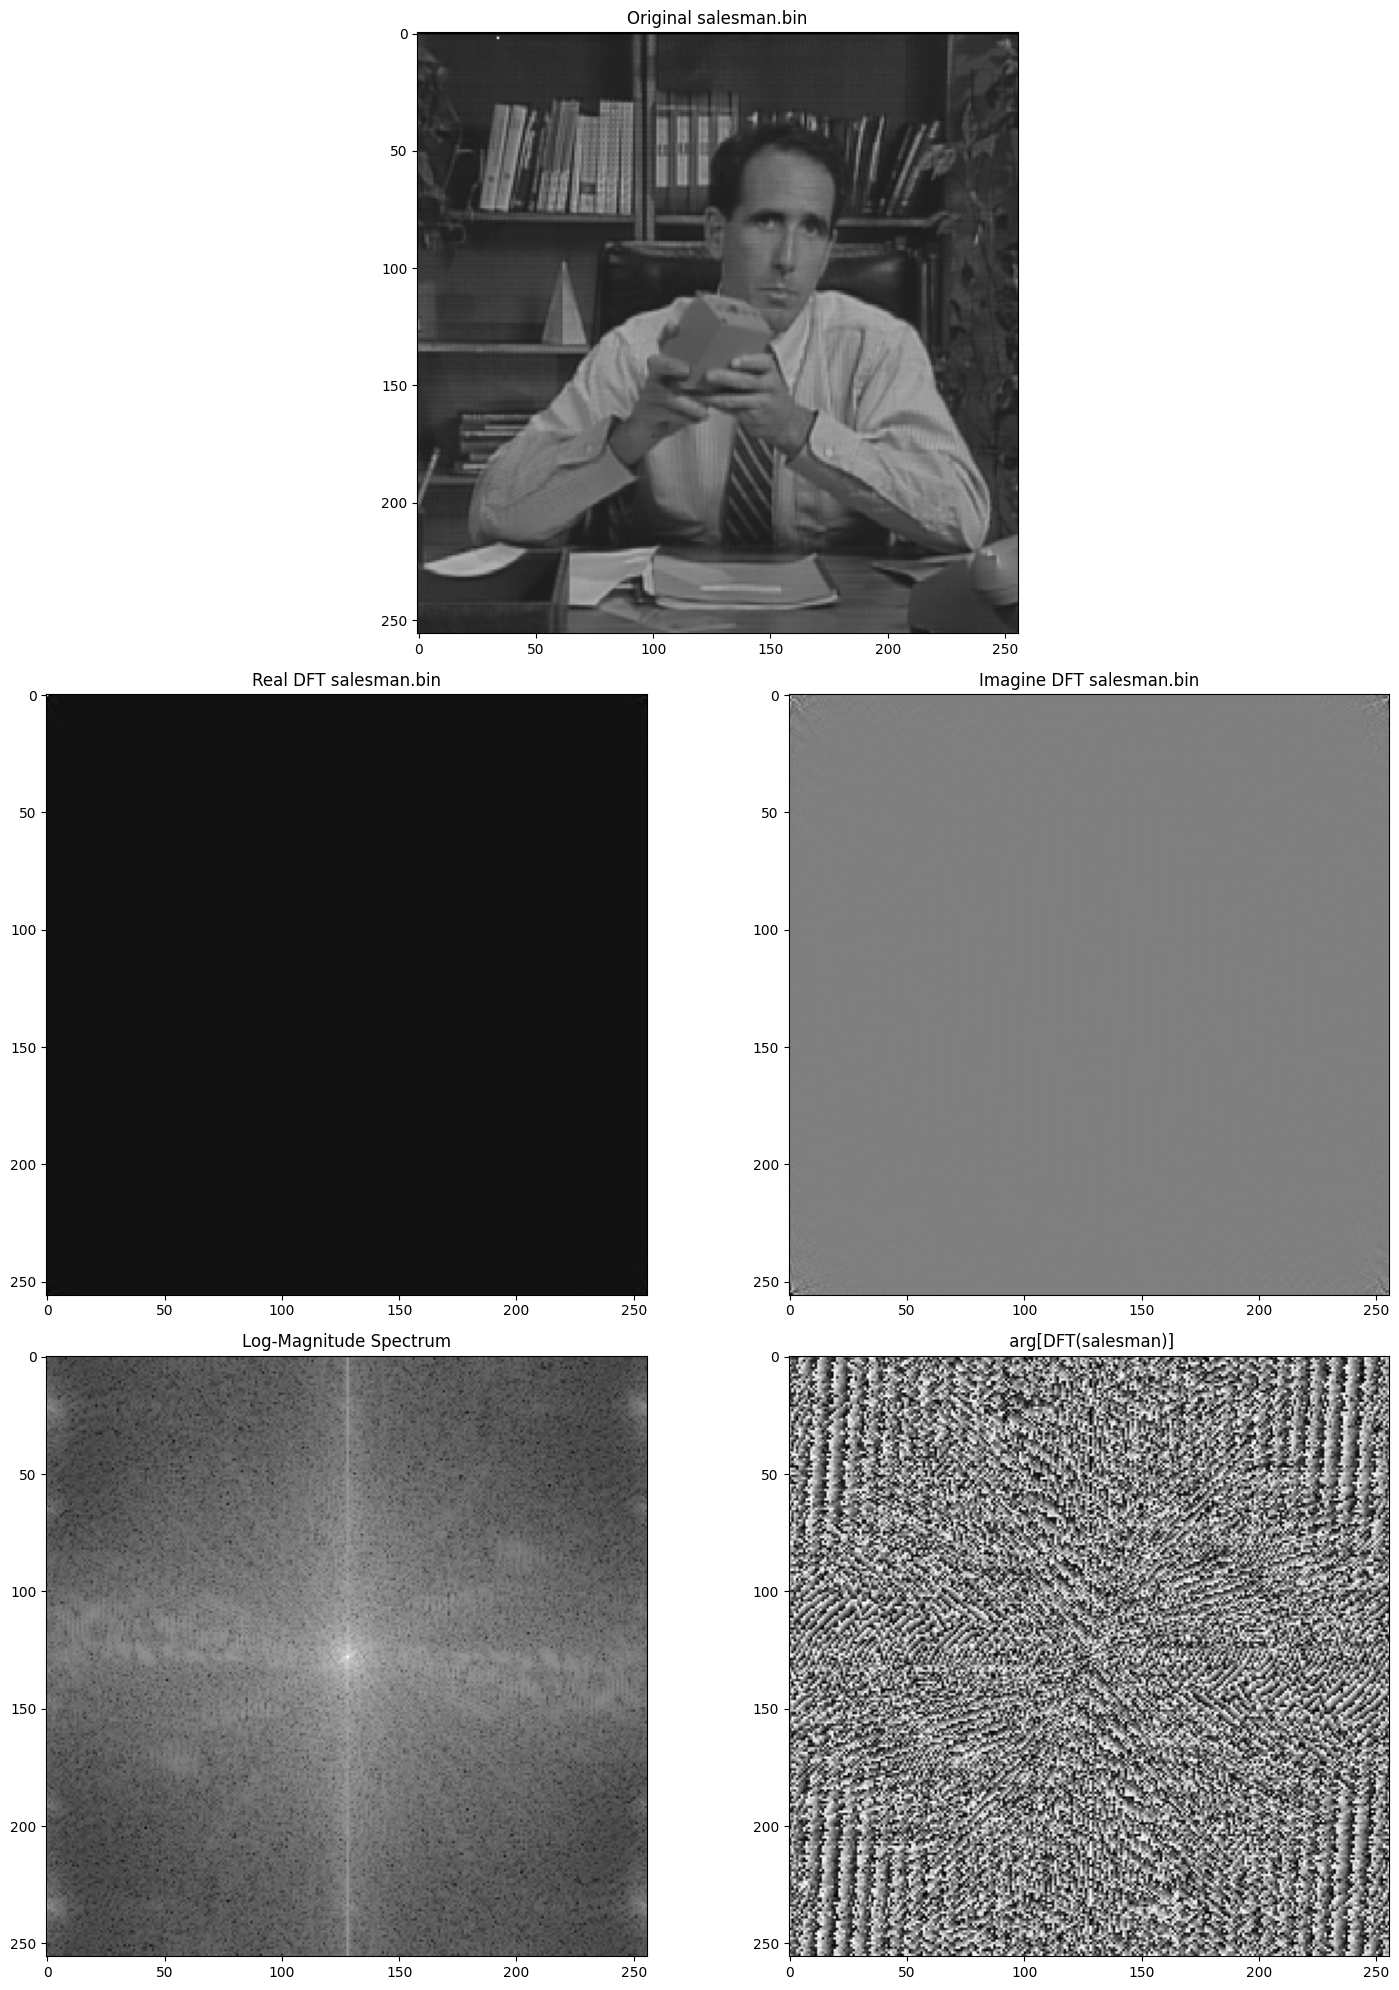

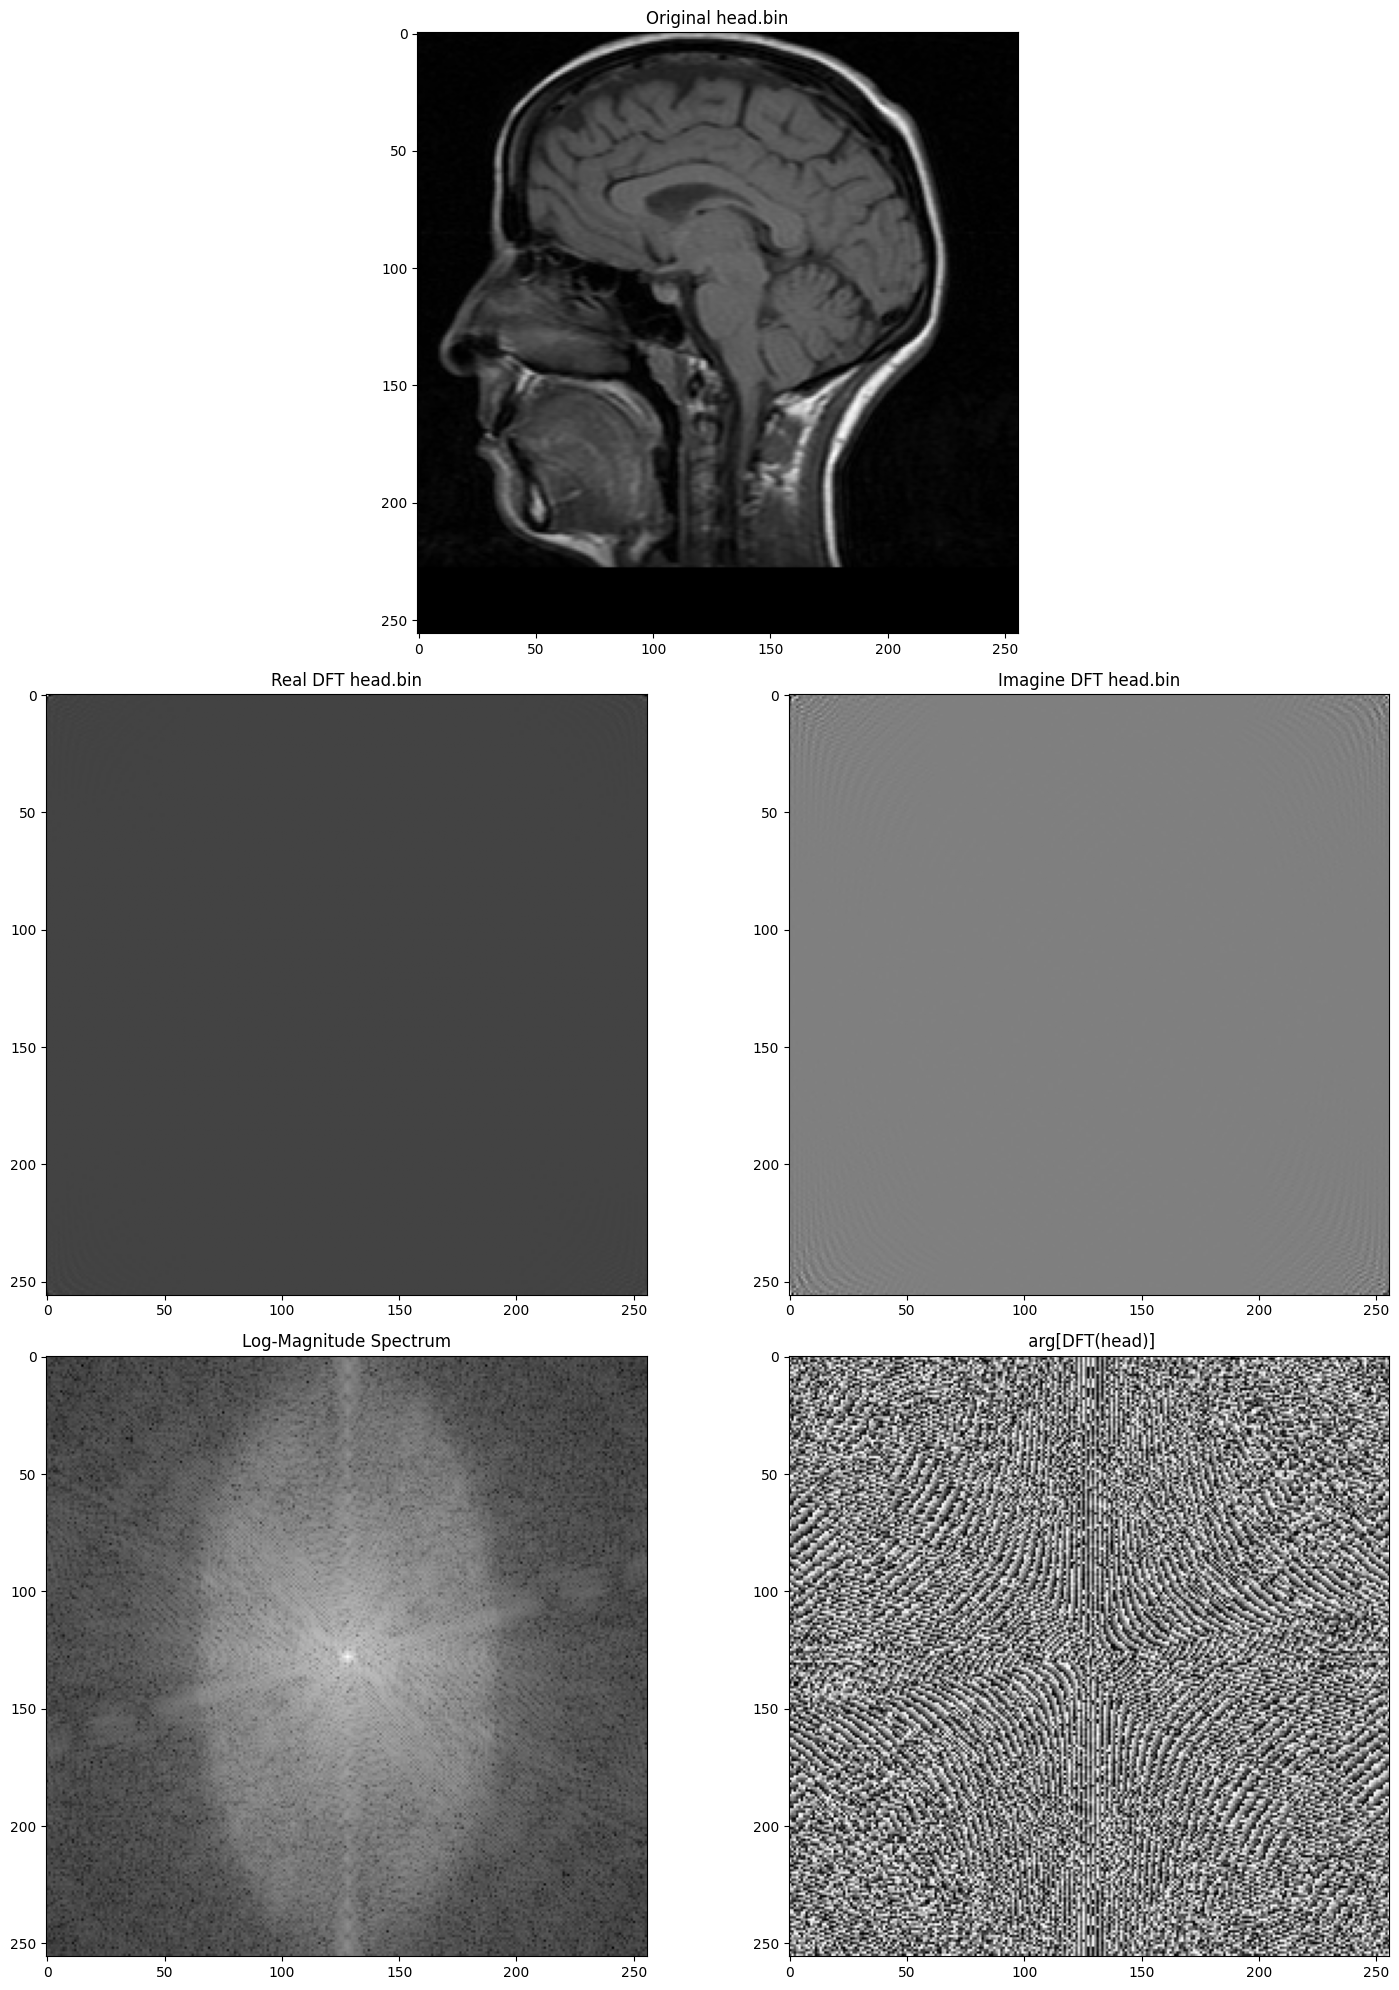

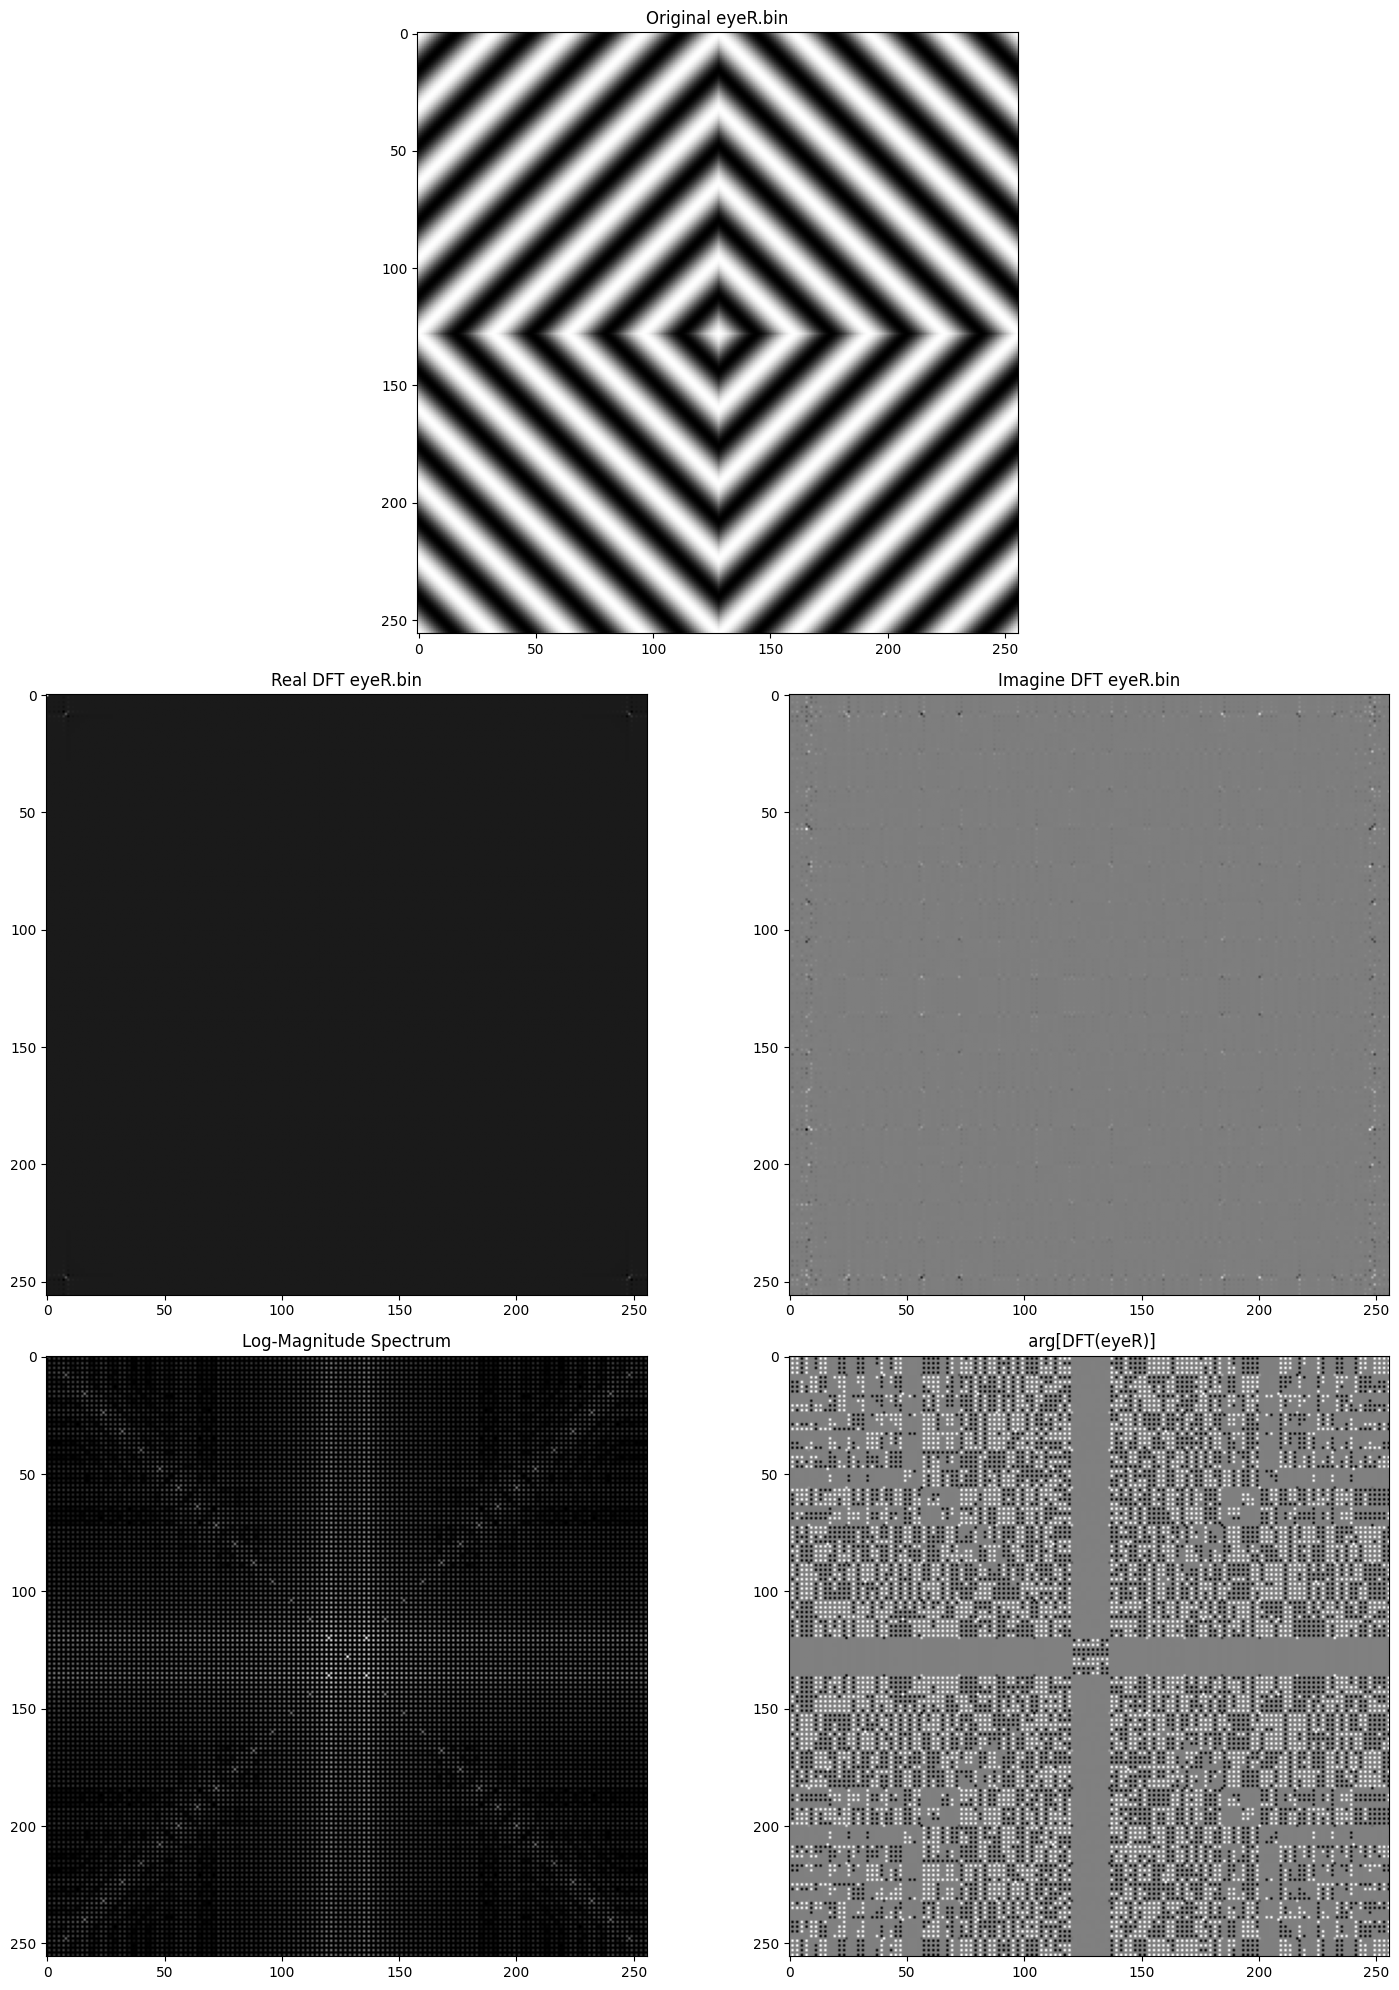

In [7]:
def read_bin_img(file_path, width=256, height=256, chanel=1):
    data = None
    with open(file_path, 'rb') as file:
        data = file.read()
    data = np.frombuffer(data, dtype=np.uint8)
    return np.reshape(data, (height, width, chanel) if(chanel > 1) else (height, width))

img_paths = ["camera.bin", "salesman.bin", "head.bin", "eyeR.bin"]
imgs = [read_bin_img(_) for _ in img_paths]

for i in range(len(imgs)):
    img = imgs[i]
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)

    plt.figure(f"{img_paths[i]}", (15, 20))

    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original {img_paths[i]}")

    plt.subplot2grid((3, 2), (1, 0))
    plt.imshow(F.real, cmap='gray')
    plt.title(f"Real DFT {img_paths[i]}")

    plt.subplot2grid((3, 2), (1, 1))
    plt.imshow(F.imag, cmap='gray')
    plt.title(f"Imagine DFT {img_paths[i]}")

    plt.subplot2grid((3, 2), (2, 0))
    plt.imshow(np.log1p(np.abs(F_shift)), cmap='gray')
    plt.title(f"Log-Magnitude Spectrum")

    plt.subplot2grid((3, 2), (2, 1))
    plt.imshow(np.angle(F_shift), cmap='gray')
    plt.title(f" arg[DFT({img_paths[i][:-4]})]")

    plt.tight_layout()

# 7

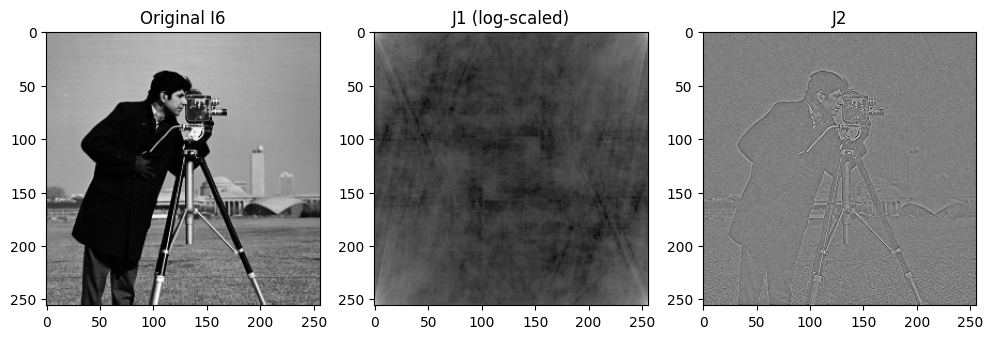

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def normalize(img):
    img = img - img.min()
    if img.max() != 0:
        img = img / img.max()
    return (img * 255).astype(np.uint8)

# Load ảnh Cameraman
img = read_bin_img("camera.bin")

# FFT và shift
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Biên độ và pha
magnitude = np.abs(F_shift)
phase = np.angle(F_shift)

# ---- J1: giữ magnitude, bỏ phase ----
J1_freq = magnitude * np.exp(1j * 0)       # pha = 0
J1 = np.fft.ifft2(np.fft.ifftshift(J1_freq)).real
J1_log = np.log1p(J1)                       # log để hiển thị
J1_img = normalize(J1_log)

# ---- J2: giữ phase, magnitude = 1 ----
J2_freq = np.exp(1j * phase)
J2 = np.fft.ifft2(np.fft.ifftshift(J2_freq)).real
J2_img = normalize(J2)

# Hiển thị kết quả
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original I6")
plt.subplot(1,3,2), plt.imshow(J1_img, cmap='gray'), plt.title("J1 (log-scaled)")
plt.subplot(1,3,3), plt.imshow(J2_img, cmap='gray'), plt.title("J2")
plt.show()
